# Decision Tree using Kaggle Animal Shelter Dataset
https://www.kaggle.com/c/shelter-animal-outcomes

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv as csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, log_loss, average_precision_score

from textblob import TextBlob

import logging

%matplotlib inline

In [2]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

In [3]:
# Set up my data directories from different machines

mac_data_dir = '/Users/christopherallison/Documents/Coding/Data'
linux_data_dir = '/home/chris/data'
win_data_dir = u'C:\\Users\\Owner\\Documents\\Data'

In [4]:
# Set data directory for example

data_dir = win_data_dir

In [5]:
# Load our prepared dataset and reference data

X = pd.read_csv(os.path.join(data_dir, "prepared_dogs_df.csv"),index_col=0)

In [6]:
# Check our data

X.columns

Index(['OutcomeType', 'SexuponOutcome', 'AgeuponOutcome', 'Color',
       'NameLength', 'BreedKMeans'],
      dtype='object')

In [7]:
# Double check our data

X.head()

OutcomeType  SexuponOutcome  AgeuponOutcome  Color  NameLength  BreedKMeans
2     Adoption             0.0               2      0           6            0
5     Transfer             1.0               0      1           4            4
12    Adoption             0.0               2      2           6            0
20    Transfer             2.0               0      3           6            0
31    Transfer             2.0               0      3           6            3

In [9]:
outcomes = X.OutcomeType.unique()

In [10]:
from sklearn import preprocessing

# This code takes our text labels and creates an encoder that we use
# To transform them into an array

encoder = preprocessing.LabelEncoder()
encoder.fit(outcomes)

encoded_y = encoder.transform(outcomes)
encoded_y

#We can also inverse_transform them back.
list(encoder.inverse_transform([0, 1, 2, 3]))

#We still need to transform the array into a matrix - this is called one hot encoding. It allows us to track the probability of each possible outcome separately.
# convert integers into dummy variables (one hot encoding)

from keras.utils import np_utils

# We'll practice with the dummy for now, but we'll transform the full labels later.
dummy_y = np_utils.to_categorical(encoded_y)
dummy_y

#We'll transform the labels into their array value, though.
X.OutcomeType = encoder.transform(X.OutcomeType)

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [11]:
# Check our work

X.head()

OutcomeType  SexuponOutcome  AgeuponOutcome  Color  NameLength  \
2             0             0.0               2      0           6   
5             3             1.0               0      1           4   
12            0             0.0               2      2           6   
20            3             2.0               0      3           6   
31            3             2.0               0      3           6   

    BreedKMeans  
2             0  
5             4  
12            0  
20            0  
31            3

In [14]:
train_features = X.values[:,1:6]
train_features[:5]

array([[ 0.,  2.,  0.,  6.,  0.],
       [ 1.,  0.,  1.,  4.,  4.],
       [ 0.,  2.,  2.,  6.,  0.],
       [ 2.,  0.,  3.,  6.,  0.],
       [ 2.,  0.,  3.,  6.,  3.]])

In [15]:
train_target = X['OutcomeType'].values
train_target

array([0, 3, 0, ..., 3, 3, 0], dtype=int64)

In [16]:
# Set up our train_test_split

X_train, x_test, y_train, y_test = train_test_split(train_features,
                                          train_target,
                                          test_size=0.4,
                                          random_state=42)

In [17]:
X.drop('OutcomeType', axis=1, inplace=True)

In [18]:
# Let's try a different estimator
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

score = dt_clf.score(X_train, y_train)
"Mean accuracy of Decision Tree: {0}".format(score)

'Mean accuracy of Decision Tree: 0.9147679324894514'

In [19]:
dt_y_predict = dt_clf.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn import metrics
print ("Accuracy = %.2f" % (accuracy_score(y_test, dt_y_predict)))

Accuracy = 0.54


In [20]:
from sklearn.externals.six import StringIO

with open(os.path.join(win_data_dir, "shelter.dot"), 'w') as f:
    f = tree.export_graphviz(dt_clf, out_file=f)

In [21]:
import pydotplus as pydot
dot_data = StringIO() 
tree.export_graphviz(dt_clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("shelter.pdf") 

True

In [22]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(dt_clf, out_file=dot_data,  
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.54232 to fit



In [23]:
# Evaluate the model
print (X_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(2370, 5) (2370,)
(1580, 5) (1580,)


In [26]:
model_score = dt_clf.score(x_test, y_test)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print ("Confusion Matrix \n", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.54 

Confusion Matrix 
 [[ 72   3  36 155]
 [  2   0   1   6]
 [ 17   0  76 147]
 [187   4 162 712]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 |  72 |   3 |
Actual   |-----|-----|
       1 |   2 |   0 |
         |-----|-----|


In [27]:

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    # Simple plot based on the Iris sample CM
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

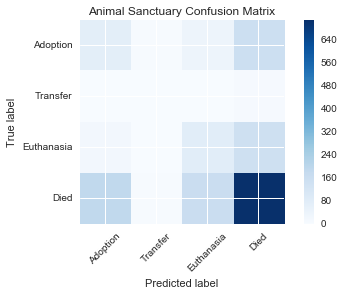

In [29]:
plot_confusion_matrix(confusion_matrix, outcomes, title="Animal Sanctuary Confusion Matrix")

In [33]:
# Plot the importance of the different features

importances = dt_clf.feature_importances_
std = np.std([dt.feature_importances_ for tree in dt_clf.estimators_],
            axis=0)
indices = np.argsort(importances)[::-1]

AttributeError: 'DecisionTreeClassifier' object has no attribute 'estimators_'

1. feature 2 (0.490423)
2. feature 3 (0.209987)
3. feature 1 (0.126228)
4. feature 4 (0.112114)
5. feature 0 (0.061248)


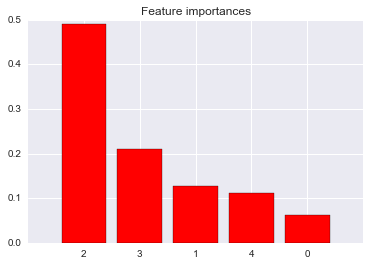

In [34]:
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [37]:
for i in [2, 3, 1, 4, 0]:
    print("Feature {}: {}".format(i, X.columns[i]))

Feature 2: Color
Feature 3: NameLength
Feature 1: AgeuponOutcome
Feature 4: BreedKMeans
Feature 0: SexuponOutcome


### Our decision tree classifier is actually a fair bit more accurate than the random forest classifier, but weighs the features very similarly.  So, what's next.